In [55]:
# Se instalan las librerías necesarias
!pip install scikit-learn

## COMPARACIÓN DEL DISEÑO DE LOS DOS MODELOS

Random Forest Regressor:
Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10, 'bootstrap': True}
Mean Squared Error: 3.801175440044827
R^2 Score: 0.07916259580439866

Decision Tree Regressor:
Mean Squared Error: 3.849309292468742
R^2 Score: 0.06750213644937109

Linear Regression:
Mean Squared Error: 3.953533212000171
R^2 Score: 0.04225381917746929


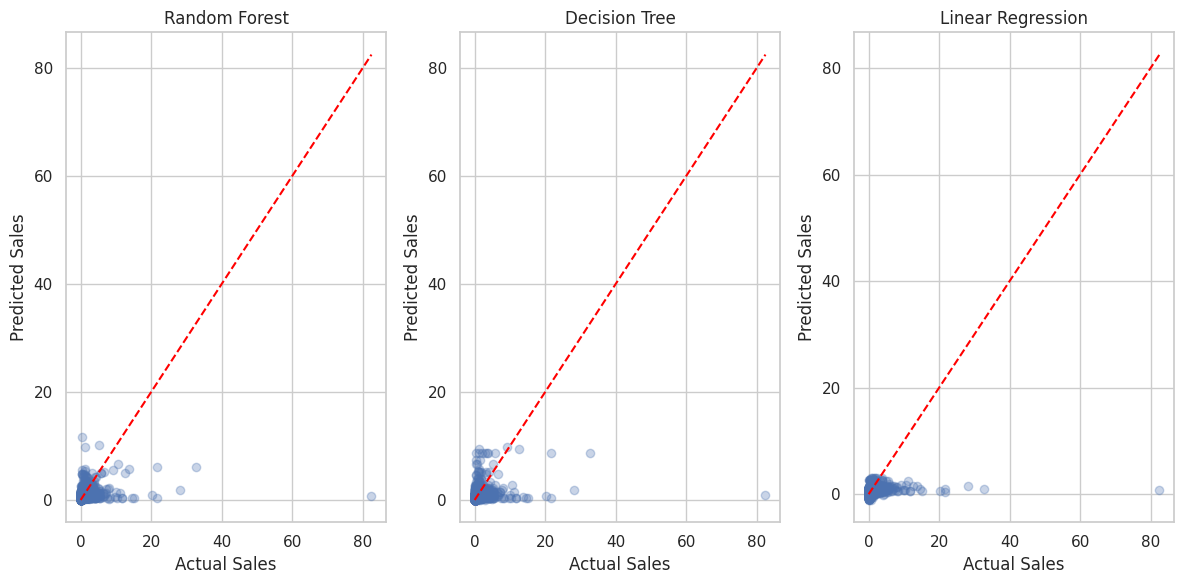

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Definir el modelo Random Forest y sus hiperparámetros
rf_model = RandomForestRegressor(random_state=42)
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Realizar la búsqueda de hiperparámetros con RandomizedSearchCV
rf_random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_params, n_iter=10, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)
rf_random_search.fit(X_train, y_train)

# Evaluar el mejor modelo de Random Forest
rf_best_model = rf_random_search.best_estimator_
rf_y_pred = rf_best_model.predict(X_test)

# Métricas de desempeño para Random Forest
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

# Comparar con los resultados del Árbol de Decisión
dt_y_pred = best_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)

# Comparar con los resultados de la Regresión Lineal
lr_model = LinearRegression(fit_intercept=True)
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_r2 = r2_score(y_test, lr_y_pred)

# Resultados
print("Random Forest Regressor:")
print(f"Best parameters: {rf_random_search.best_params_}")
print(f"Mean Squared Error: {rf_mse}")
print(f"R^2 Score: {rf_r2}")

print("\nDecision Tree Regressor:")
print(f"Mean Squared Error: {dt_mse}")
print(f"R^2 Score: {dt_r2}")

print("\nLinear Regression:")
print(f"Mean Squared Error: {lr_mse}")
print(f"R^2 Score: {lr_r2}")

# Visualización de los resultados
plt.figure(figsize=(12, 6))

# Predicciones vs Valores Reales
plt.subplot(1, 3, 1)
plt.scatter(y_test, rf_y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Random Forest')

plt.subplot(1, 3, 2)
plt.scatter(y_test, dt_y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Decision Tree')

plt.subplot(1, 3, 3)
plt.scatter(y_test, lr_y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Linear Regression')

plt.tight_layout()
plt.show()

**Análisis Comparativo**

**Desempeño General:**

- Random Forest tiene el mejor desempeño entre los tres modelos, con el MSE más bajo (3.801) y el R² más alto (0.079), aunque aún es bajo, indicando que este modelo tiene la mejor capacidad predictiva de los tres pero aún no captura completamente la complejidad de los datos.

- Decision Tree sigue de cerca al Random Forest con un MSE de 3.849 y un R² de 0.068. Este modelo también muestra un rendimiento mejorado en comparación con la Regresión Lineal, pero sigue siendo subóptimo.

- Linear Regression tiene el peor desempeño, con el MSE más alto (3.954) y el R² más bajo (0.042), indicando que este modelo es el menos adecuado para estos datos.

**Curvas de Predicción vs. Valores Reales:**

- Random Forest: La dispersión de puntos alrededor de la línea roja (predicciones perfectas) es menor que en los otros dos modelos, lo que sugiere una mejor precisión general.

- Decision Tree: Presenta una dispersión similar a la del Random Forest pero con más puntos alejados de la línea roja, lo que indica menor precisión en comparación.

- Linear Regression: Tiene la mayor dispersión de puntos, mostrando que las predicciones están menos alineadas con los valores reales.

**Interpretación de las Gráficas:**

- La línea roja discontinua representa la línea de predicciones perfectas. Los puntos más cercanos a esta línea indican mejores predicciones.

- En todas las gráficas, los puntos están bastante dispersos, lo que sugiere que ninguno de los modelos está capturando bien la variabilidad en las ventas globales de videojuegos.


**Conclusión Final**

La inclusión de modelos más sofisticados como el modelo de Random Forest mostró el mejor desempeño en términos de MSE y R², seguido por el Árbol de Decisión y, finalmente, la Regresión Lineal.

Sin embargo, todos los modelos tienen un R² relativamente bajo, indicando que no están capturando bien la variabilidad en las ventas globales de videojuegos. Se recomienda explorar modelos aún más complejos y agregar más características relevantes para mejorar el rendimiento predictivo del presente proyecto de analítica de datos.